# CNN

### Instructions

- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by _Runtime -> Run all_. **Keep all cell outputs** for grading.


Install PyTorch and Skorch.


In [5]:
import os
def playSound():
    duration = 1  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

In [6]:
!pip3 install -q torch skorch torchvision torchtext sklearn numpy matplotlib


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import skorch
import sklearn
import numpy as np
import matplotlib.pyplot as plt


## 1. Tensor Operations (20 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.


### 1) Tensor squeezing, unsqueezing and viewing


Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.


In [8]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(x)
print(x.shape)
print()
# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x = torch.Tensor.unsqueeze(x, 1)
x = torch.Tensor.unsqueeze(x, 3)
print(x)
print(x.shape)
print()
# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = torch.Tensor.squeeze(x, 3)
x = torch.Tensor.squeeze(x, 1)
print(x)
print(x.shape)
print()
# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x = torch.Tensor.view(x, 6)

print(x)
print(x.shape)


tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
torch.Size([3, 2])

tensor([[[[1.],
          [2.]]],


        [[[3.],
          [4.]]],


        [[[5.],
          [6.]]]])
torch.Size([3, 1, 2, 1])

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
torch.Size([3, 2])

tensor([1., 2., 3., 4., 5., 6.])
torch.Size([6])


### 2) Tensor concatenation and stack


Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.


In [9]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.

# Use torch.stack to generate such a z

z = torch.stack([x, y])

print(z)
print(z.shape)

# Use torch.cat and torch.unsqueeze to generate such a z
z = torch.cat([torch.Tensor.unsqueeze(x, 0), torch.Tensor.unsqueeze(y, 0)], 0)

print(z)
print(z.shape)


tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])
torch.Size([2, 3, 2])
tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])
torch.Size([2, 3, 2])


### 3) Tensor expansion


Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice.


In [10]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.

# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = torch.Tensor.unsqueeze(x, 0)

# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
x = x.expand(2, 3)
print(x)
print(x.shape)


tensor([[1., 2., 3.],
        [1., 2., 3.]])
torch.Size([2, 3])


### 4) Tensor reduction in a given dimension


In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.


In [11]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)

# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
# x_mean = torch.empty(10)
x_mean = x.mean(1)
print("x_mean", x_mean)
print()
# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = x.sum(1)
print("x_sum", x_sum)
print()
# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
x_max = x.max(1)
print("x_max", x_max)
print()
# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
x_min = x.min(1)
print("x_min", x_min)
print()
# Compute the top-5 values for each row of x.
# You need to generate a tensor x_mean of size (10, 5), and x_top[k, :] is the top-5 values of each row in x.
x_top = x.topk(5, 1)
print("x_top", x_top)
print()


x_mean tensor([-0.0036, -0.0880,  0.1812,  0.0058, -0.0257,  0.0258, -0.0190,  0.1028,
         0.0253, -0.0807])

x_sum tensor([-0.1808, -4.4005,  9.0600,  0.2877, -1.2868,  1.2910, -0.9507,  5.1418,
         1.2636, -4.0349])

x_max torch.return_types.max(
values=tensor([2.5207, 2.6674, 2.4203, 1.8042, 1.8416, 1.6122, 2.3258, 3.5771, 1.5038,
        2.2145]),
indices=tensor([19, 20,  7, 41, 22, 34, 11, 43, 18, 48]))

x_min torch.return_types.min(
values=tensor([-1.8507, -2.2624, -1.6671, -2.2414, -2.6799, -1.8943, -2.0056, -1.8825,
        -1.1655, -2.7817]),
indices=tensor([30, 25, 49,  1,  2, 46, 30, 45, 22, 49]))

x_top torch.return_types.topk(
values=tensor([[2.5207, 1.5648, 1.3340, 1.1838, 1.1267],
        [2.6674, 1.8359, 1.6093, 1.2385, 1.0927],
        [2.4203, 2.1401, 1.4795, 1.2900, 1.1547],
        [1.8042, 1.7501, 1.7177, 1.5697, 1.4382],
        [1.8416, 1.5669, 1.2468, 1.0948, 1.0904],
        [1.6122, 1.4926, 1.2493, 1.1157, 0.9840],
        [2.3258, 1.9184, 1.8805, 1.

## Convolutional Neural Networks (40 points)


Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`. For this question, we use the default validation split generated by Skorch.


In [12]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True,
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)


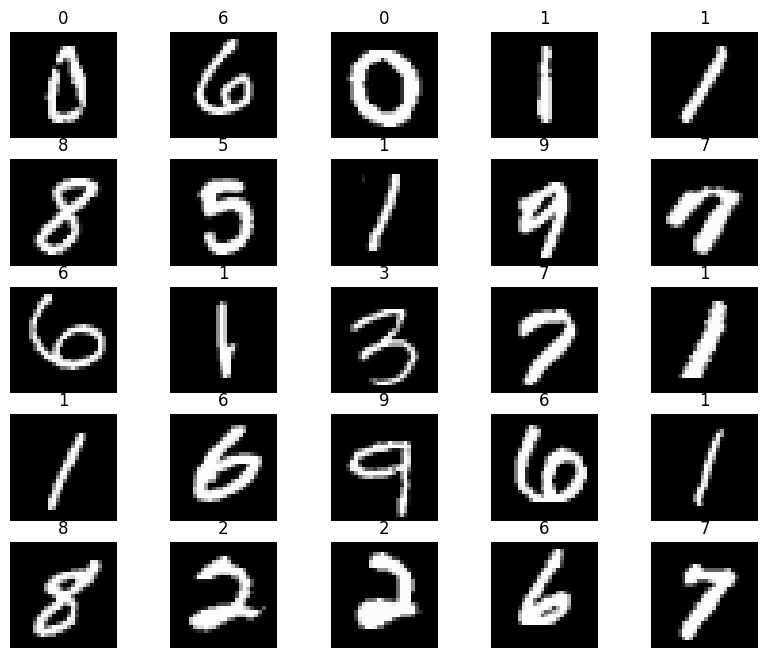

In [13]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.


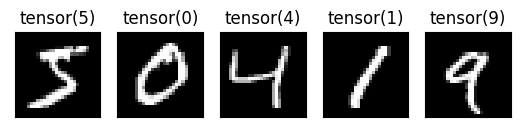

In [14]:
def plot(data, labels=None, num_sample=5):
    n = min(len(data), num_sample)
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        if labels is not None:
            plt.title(labels[i])


# train.labels = [train.classes[target] for target in train.targets]
plot(train_data.data, train_data.targets)


In [15]:
train_data.data.shape


torch.Size([60000, 28, 28])

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.


#### a) Implement convolutional layers


Implement the initialization function and the forward function of the CNN.


In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=512,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),

            nn.Conv2d(512, 512, 3, 1, 1),
            nn.ReLU(),

            nn.Conv2d(512, 512, 3, 1, 1),
            nn.ReLU()
        )

        self.fc1 = nn.Linear(512 * 28 * 28, 10)

    def forward(self, images):
        out = self.network(images)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        return out


cnn = CNN()
print(cnn)


CNN(
  (network): Sequential(
    (0): Conv2d(1, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
  )
  (fc1): Linear(in_features=401408, out_features=10, bias=True)
)


#### b) Tune hyperparameters


Train the CNN model on CIFAR-10 dataset. Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.


In [17]:
# implement input normalization & type cast here
train_data.data = train_data.data / 255
train_data.data = torch.Tensor.unsqueeze(train_data.data, 1)


In [79]:
# implement hyperparameters here
model = skorch.NeuralNetClassifier(CNN,
                                   optimizer=optim.Adam,
                                   criterion=torch.nn.CrossEntropyLoss,
                                   device="cuda")
model.fit(train_data.data, train_data.targets)

  epoch    train_loss    valid_acc    valid_loss       dur
-------  ------------  -----------  ------------  --------
      1       96.1800       0.1123        2.3016  217.7355
      2        2.3015       0.1044        2.3016  219.9085
      3        2.3016       0.1044        2.3017  220.0999
      4        2.3016       0.1044        2.3017  219.8321
      5        2.3016       0.1044        2.3017  219.2973
      6        2.3017       0.1044        2.3017  219.3143
      7        2.3017       0.1044        2.3017  220.0026
      8        2.3017       0.1044        2.3018  219.3979
      9        2.3017       0.1044        2.3018  219.5203
     10        2.3017       0.1044        2.3018  219.8218


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN(
    (network): Sequential(
      (0): Conv2d(1, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
    )
    (fc1): Linear(in_features=401408, out_features=10, bias=True)
  ),
)

Write down **validation accuracy** of your model under different hyperparameter settings. Note the validation set is automatically split by Skorch during `model.fit()`.

**Hint:** You may need more epochs for SGD than Adam.

| #channel for each layer \ optimizer | SGD   | Adam  |
|-------------------------------------|-------|-------|
| (128, 128, 128)                     |   0.9767    |   0.1044    |
| (256, 256, 256)                     |   0.9783    |    0.1044   |
| (512, 512, 512)                     |    0.9791   |    0.1044   |


### 2) Full CNN implementation


Based on the CNN in the previous question, implement a full CNN model with max pooling layer.

- Add a max pooling layer after each convolutional layer.
- Each max pooling layer has a kernel size of 2 and a stride of 2.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table. You are also required to complete the questions.


#### a) Implement max pooling layers


Copy the CNN implementation in previous question. Implement max pooling layers.


In [18]:
class CNN_MaxPool(nn.Module):
    def __init__(self):
        super(CNN_MaxPool, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=512,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(512, 1024, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(1024, 2048, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.fc1 = nn.Linear(2048 * 3 * 3, 10)

    def forward(self, images):
        out = self.network(images)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        return out


CNN_MaxPool()


CNN_MaxPool(
  (network): Sequential(
    (0): Conv2d(1, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=18432, out_features=10, bias=True)
)

#### b) Tune hyperparameters


Based on best optimizer you found in the previous problem, tune the number of channels and learning rate for best validation accuracy.


In [88]:
model = skorch.NeuralNetClassifier(CNN_MaxPool,
                                   optimizer=optim.RMSprop,
                                   criterion=torch.nn.CrossEntropyLoss,
                                   lr=0.01,
                                   device="cuda")
model.fit(train_data.data, train_data.targets)


  epoch    train_loss    valid_acc    valid_loss       dur
-------  ------------  -----------  ------------  --------
      1    34039.4129       0.1243        2.2906  152.6722
      2        4.6153       0.2627        2.0170  156.7308
      3        1.5735       0.6867        0.9447  154.8558
      4       41.8043       0.3126        2.0092  155.5305
      5        2.5870       0.1044        2.3015  155.6134
      6        2.3018       0.1044        2.3015  155.3374
      7        2.3018       0.1044        2.3015  152.2302
      8        2.3018       0.1044        2.3015  151.2356
      9        2.3018       0.1044        2.3015  156.7700
     10        2.3018       0.1044        2.3015  158.1971


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN_MaxPool(
    (network): Sequential(
      (0): Conv2d(1, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU()
      (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (fc1): Linear(in_features=18432, out_features=10, bias=True)
  ),
)

In [89]:
playSound()

Write down the **validation accuracy** of your model under different hyperparameter settings.


I will use SGD as it shows better performance in former execution


| #channel for each layer | validation accuracy |
| ----------------------- | ------------------- |
| (128, 128, 128)         |        0.9703             |
| (128, 256, 512)         |          0.9723           |
| (256, 256, 256)         |           0.9728           |
| (256, 512, 1024)        |       0.9739              |
| (512, 512, 512)         |        0.9752             |
| (512, 1024, 2048)       |          0.9761          |


For the best model you have, test it on the test set.

It is fine if you found some hyperparameter combination better than those listed in the tables.


In [ ]:
# normalization
test_data.data = test_data.data / 255
test_data.data = torch.Tensor.unsqueeze(test_data.data, 1)


In [ ]:
# implement the same input normalization & type cast here
test_data.predictions = model.predict(test_data.data)
sklearn.metrics.accuracy_score(test_data.targets, test_data.predictions)


How much **test accuracy** do you get?

**Your Answer : 0.9809** 


What can you conclude for the design of CNN structure?

**Your Answer:** CNN can show great accuracy with smaller size of inputs and also it is better for image processing as it can tolerate changing subject position in the picture.

i think the most important thing to remember when creating a cnn is to pay attention to the data size in input and iutput and it think it is the most challenging part of designing a cnn.

also each convoultion layer in and out size plays an importatn role in predection accuracy.


- **Subtask 2-1: Completing the Table**

We have provided the following table for different combinations of optimizers and learning rate, please write down the **validation accuracy** of your model with different optimizers and learning rates.

|         | 0.1 | 0.01 | 0.001 | 0.0001 |
| ------- | --- | ---- | ----- | ------ |
| SGD     |   0.9893  | 0.9768     | 0.9166      |  0.7208      |
| Adam    |  0.1022   |   0.9437   |  0.9866     |    0.9897    |
| RMSprop |  0.0985   |  0.1044    |    0.9848   |    0.9748    |


- **Subtask 2-2: Explaining your Observations**

Based on your results, briefly explain your observations, e.g., which optimizer works the best, what is the optimal learning rate for each optimizer?

_Your Answer:_

**As we can conclude from the results, SGD optimizer works better when the learning rate is greater. the best learning rate for SGD is 0.1.**

**unlike SGD, Adam works better with smaller learning rates as the learning rates gets smaller the results of Adam gets better. the best learning rate for Adam 1e-4.**

**comparing the results shows that the RMSprop does not show good results. other Optimizers show better results than this optimizer. However the best learning rate for RMSprop is 1e-4.**


### 3) Compare the Results under Different Epoches


In this task, we hope to compare the results of our model under different training epoches, and answer a question.


- **Subtask 3-1: Completing the Table**

We have provided the following table, please write down the **training Loss** and **validation accuracy** of your model under different epoches.

|                     | 10  | 20  | 30  | 40  | 50  |
| ------------------- | --- | --- | --- | --- | --- |
| Training Loss   |  0.0101   |  0.0017   |   0.0005  |  0.0003   |  0.0002   |
| Validation Accuracy |  0.9891   |  0.9852   |  0.9907   |  0.9908   |  0.9915   |


- **Subtask 3-2: Answering the Question**

Is it always better to train a model for more epoches? How can we decide when should we stop training?

_Your Answer:_

for answering this subtask we use SGD with learning rate equal to 0.1.

we can not conclude that always training the model with more epoches is good and the results would be better, cause after some points, overfitting so after that the model will depend on training data a lot. so when it happens data can now predict data in test data as it overfitts on training data.

in this case the model accuracy increased with number of epoches but the difference is not that much, as we can see the difference between 30 and 40 epoches is equal to 1e-4.

